In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Install packages**

# !pip install tensorflow -U

# **Abstract work**

Abstract A brain tumor denotes an anomalous mass or collection of cells that develops within the brain. We have considered about the three categories of brain tumors among the various 120 categories namely Glioma, Meningioma and Pituitary along with No Tumor. Automated classification of different brain tumor categories using Magnetic Resonance Imaging (MRI) brain scans is this paper's unique approach.
Project Definition: Brain Cancer Classification System Using a Fusion of CNN and LSTM Layers

### Background:

Brain cancer is a prevalent and critical health issue requiring precise diagnostic tools for effective treatment planning. This project focuses on designing a classification system that combines Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) layers to analyze medical images and identify signs of brain cancer.

### Objective:

The primary objective of this project is to develop a sophisticated classification system for medical images of the brain. The integration of CNN and LSTM layers aims to enhance the accuracy of brain cancer detection, providing valuable support to healthcare professionals in their decision-making processes.

### Expected Steps:

1. Data Collection:
   - Utilize the Kaggle dataset named "Brain Tumor Classification (MRI)" to obtain labeled medical images showcasing various aspects of brain anatomy, with a specific focus on cancerous regions.

2. Image Processing:
   - Preprocess the images, including resizing and normalization, to prepare them for input into the CNN-LSTM model.

3. Model Architecture:
   - Construct a hybrid model featuring CNN layers to capture spatial features and LSTM layers for analyzing temporal patterns in the data. Utilize a pre-trained ResNet architecture for the CNN component.

4. Training and Validation:
   - Train the model using the labeled dataset, employing techniques like transfer learning for the ResNet component. Validate the model's performance on a separate validation dataset.

5. Hyperparameter Tuning:
   - Optimize hyperparameters and fine-tune the model for improved classification accuracy.

6. Evaluation Metrics:
   - Assess the model's performance using metrics such as accuracy, precision, recall, and F1 score.

7. Integration and Deployment:
   - Integrate the trained model into a user-friendly system that can be utilized by medical professionals for brain cancer classification.

### Technologies Used:

- Convolutional Neural Network (CNN) with ResNet architecture
- Long Short-Term Memory (LSTM)
- Transfer Learning
- TensorFlow and Keras (deep learning libraries)
- Python (for code implementation)

### Expected Outputs:

- A robust classification model combining CNN and LSTM layers for brain cancer detection.
- Evaluation metrics report demonstrating the model's effectiveness.
- Integrated software for medical image analysis in a clinical setting.

Note: Make sure to comply with the dataset's terms of use and cite it appropriately in your project documentation.

# **Introduction to Dataset**

A Brain tumor is considered as one of the most aggressive diseases, among children and adults. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and 36 percent for women. And the best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). The dataset is contributed by Navoneel Chakrabarty and Swati Kanchan.

This dataset provides a huge amount of image data generated through the scans. These images are typically examined by the radiologist. However, a manual examination can be error-prone due to the complexities. Hence, proposing a system performing detection and classification is the main goal of this dataset.

# **import libraries**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import pickle

2023-12-12 23:16:16.434521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 23:16:16.434698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 23:16:16.435624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **"Custom Color Palettes for Enhanced Visualizations"**

In [5]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

# **"Data Augmentation with Random Rotation and Flip in TensorFlow"**

In [6]:
rot = tf.keras.layers.RandomRotation(factor=0.2)
flip = tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")

def augment(images):
    for i in range(len(images)):
        flipped = flip(images[i])
        images[i] = rot(flipped)
    
    return images

# **"Loading and Preprocessing Brain Tumor MRI Images for Classification"**

In [7]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        #img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        #img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:01<00:00, 58.86it/s]


# "Converting Brain Tumor Labels to Categorical for Classification Model"

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

# **"Augmenting Brain Tumor Image Data for Improved Model Performance"**

In [9]:
X_train = np.vstack((X_train, augment(X_train)))
y_train = np.vstack((y_train, y_train.copy()))

# **"Checking the Shape of Augmented Brain Tumor Image Data and Labels"**

In [10]:
X_train.shape, y_train.shape

((6528, 224, 224, 3), (6528, 4))

# **"Shuffling Augmented Brain Tumor Image Data and Labels"**

In [12]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)

# **"Splitting Augmented Brain Tumor Data into Training and Testing Sets"**

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

# **"Checking the Shape of Training and Testing Data after Split"**

In [14]:
X_train.shape, X_test.shape

((5875, 224, 224, 3), (653, 224, 224, 3))

# **"Loading ResNet50 Model for Feature Extraction"**

In [15]:
r50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

94765736/94765736 [==============================] - 1s 0us/step


# **"Generating Predictions Using ResNet50 for Training and Testing Data"**

In [16]:
X_train_preds = r50.predict(X_train)
X_test_preds = r50.predict(X_test)

21/21 [==============================] - 39s 2s/step


# **"ResNet50 Extracted Features Shape for Training and Testing Datasets"**

In [17]:
X_train_preds.shape, X_test_preds.shape

((5875, 7, 7, 2048), (653, 7, 7, 2048))

# **"Reshaped ResNet50 Extracted Features for Training and Testing Datasets"**

In [18]:
X_train_features = np.zeros((5875, 1, 100352))
for i in range(5875):
    X_train_features[i] = X_train_preds[i].reshape((1, 100352))

X_test_features = np.zeros((653, 1, 100352))
for i in range(653):
    X_test_features[i] = X_test_preds[i].reshape((1, 100352))

# **"Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(512, input_shape=(1, 100352), activation='relu', return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(256, activation='relu', return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation='softmax')
])

# **"Summary of Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 512)            206571520 
                                                                 
 dropout (Dropout)           (None, 1, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 256)            787456    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                4

# **"Compiling Cascaded CNN-LSTM Model for Brain Tumor Classification"**

In [22]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

# **"Configuring Callbacks for CNN-LSTM Model Training"**

In [23]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("bestomodelo.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

# **"Training CNN-LSTM Model with ResNet Features"**

In [24]:
history = model.fit(X_train_features, y_train, validation_split=0.1, epochs=50, verbose=1, batch_size=32, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
166/166 [==============================] - ETA: 0s - loss: 1.4171 - accuracy: 0.3115
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to bestomodelo.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


166/166 [==============================] - 242s 1s/step - loss: 1.4171 - accuracy: 0.3115 - val_loss: 1.2801 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 2/50
166/166 [==============================] - ETA: 0s - loss: 1.1930 - accuracy: 0.4269
Epoch 2: val_accuracy improved from 0.41667 to 0.57143, saving model to bestomodelo.h5
166/166 [==============================] - 251s 2s/step - loss: 1.1930 - accuracy: 0.4269 - val_loss: 0.9018 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 3/50
166/166 [==============================] - ETA: 0s - loss: 0.8537 - accuracy: 0.6425
Epoch 3: val_accuracy improved from 0.57143 to 0.76871, saving model to bestomodelo.h5
166/166 [==============================] - 263s 2s/step - loss: 0.8537 - accuracy: 0.6425 - val_loss: 0.6088 - val_accuracy: 0.7687 - lr: 0.0010
Epoch 4/50
166/166 [==============================] - ETA: 0s - loss: 0.6293 - accuracy: 0.7545
Epoch 4: val_accuracy improved from 0.76871 to 0.82823, saving model to bestomodelo.h5
166/166 [=======

# **"Training and Validation Accuracy/Loss Over Epochs"**

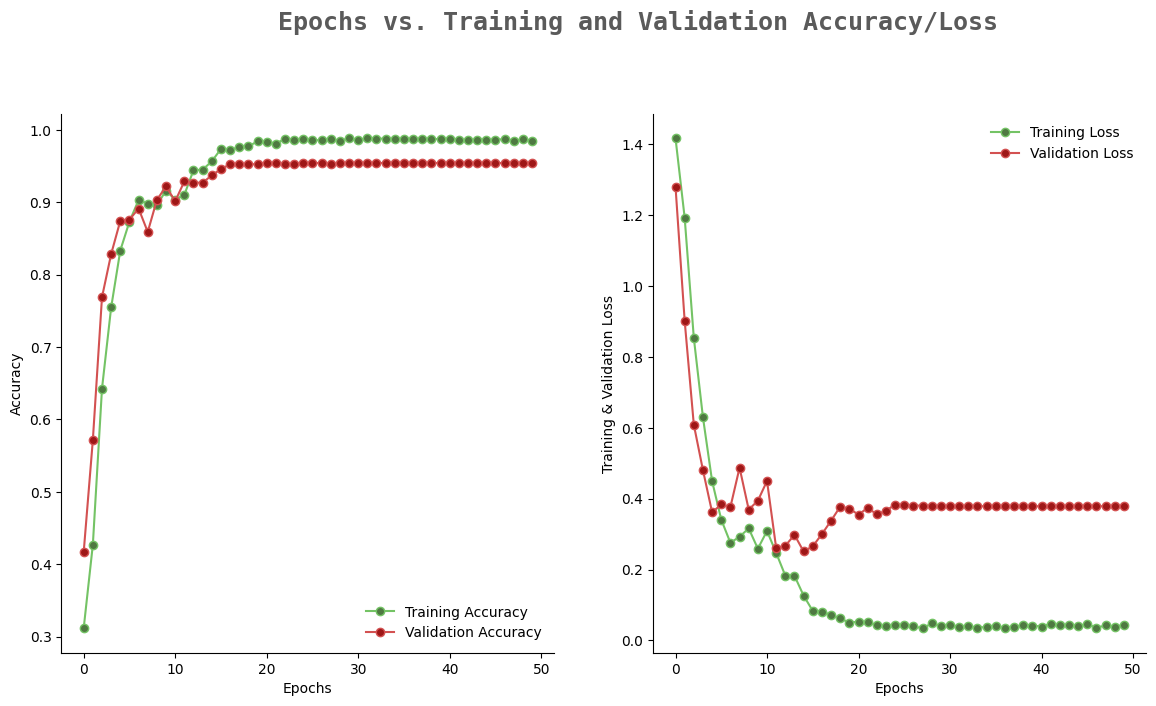

In [25]:
filterwarnings('ignore')

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

# **"Model Evaluation on Test Data"**

In [26]:
model.evaluate(X_test_features, y_test)

21/21 [==============================] - 3s 131ms/step - loss: 0.2333 - accuracy: 0.9724


[0.23330025374889374, 0.972434937953949]

# **"Model Evaluation and Performance Analysis"**

In [27]:
pred = model.predict(X_test_features)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

21/21 [==============================] - 5s 129ms/step


# **"Classification Report for Brain Tumor Classification"**

In [28]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       190
           1       0.96      0.99      0.98        99
           2       0.97      0.98      0.97       189
           3       0.97      0.99      0.98       175

    accuracy                           0.97       653
   macro avg       0.97      0.97      0.97       653
weighted avg       0.97      0.97      0.97       653



# **"Heatmap of Confusion Matrix for Brain Tumor Classification"**

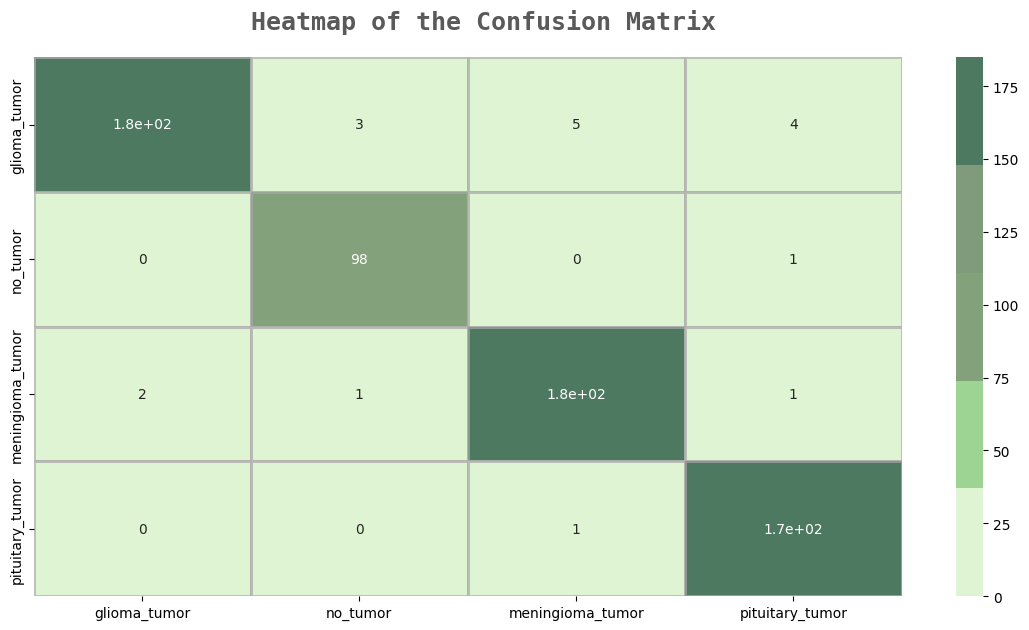

In [29]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True, cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)
plt.show()